PROJECT_2 
Студент Солодухина Е. П.

ЗАДАЧИ (ФОРМАЛИЗОВАННЫЕ):

1. Проверить, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение от пользователей, не начинавших обучение. Насколько обучение сокращает время прохождения этапов?

2. Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение само по себе влияет на оплату, и без разницы, каким этапом оно шло.

3. Дополнительная задача. Как часто пользователи начинают обучение после того, как они выбрали уровень сложности? Это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

*проверка производится на основе данных пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно).

    Подключаем библиотеки, получаем данные из файлов.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
events_df=pd.read_csv('7_4_Events.csv')
purchase_df=pd.read_csv('purchase.csv')

In [3]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB


In [4]:
purchase_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.2+ KB


    Произведём обзор данных и преобразование данных.

In [5]:
# Определяем условие вхождения пользователей в целевую группу
условие = (events_df.start_time>='2018-01-01') & (events_df.start_time<'2019-01-01') & (events_df.event_type=='registration')
# список пользователей, зарег. в 2018
registered = set(events_df[условие]['user_id'])
# Оставляем в датафреймах только записи пользователей, входящих в целевую группу
events_df = events_df[events_df['user_id'].isin(registered)]
purchase_df = purchase_df[purchase_df['user_id'].isin(registered)]
# Преобразовывыем данные строкового типа в данные типа datetime
events_df['start_time'] = pd.to_datetime(events_df['start_time'], format='%Y-%m-%dT%H:%M:%S')
purchase_df['event_datetime'] = pd.to_datetime(purchase_df['event_datetime'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
# Добавляем в столбец датафрейм purchase_df столбца с описанием события
purchase_df['event_type'] = 'purchase'
purchase_df.info()
purchase_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1171 to 2778
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1600 non-null   int64         
 1   user_id         1600 non-null   int64         
 2   event_datetime  1600 non-null   datetime64[ns]
 3   amount          1600 non-null   int64         
 4   event_type      1600 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 75.0+ KB


,id,user_id,event_datetime,amount,event_type
1171,16845,27845,2018-01-03 18:53:43,100,purchase
1172,16846,27865,2018-01-04 14:46:10,250,purchase
1174,16848,27911,2018-01-07 08:19:12,50,purchase
1175,16849,27910,2018-01-07 12:11:34,100,purchase
1176,16850,27940,2018-01-07 13:16:41,200,purchase
...,...,...,...,...,...
2767,18441,47498,2019-01-02 03:48:19,100,purchase
2768,18442,47647,2019-01-02 23:26:26,150,purchase
2769,18443,47554,2019-01-03 00:36:36,50,purchase
2774,18448,47742,2019-01-04 12:51:41,50,purchase


In [7]:
# Переименовываем столбцы

events_df = events_df.rename(columns={'id':'event_id'})
events_df = events_df.rename(columns={'start_time':'event_time'})
purchase_df = purchase_df.rename(columns={'id':'purchase_id'})
purchase_df = purchase_df.rename(columns={'event_datetime':'event_time'})

In [8]:
# Объединим датафреймы и запишем объединенный датафрейм в переменную total_events_df

total_events_df = pd.concat([events_df,purchase_df],sort=False).reset_index(drop=True).sort_values('event_time')

print("Количество пустых значений в колонках total_events_df, (%)")
print(round((total_events_df.isnull().sum()*100/total_events_df.shape[0]), 2))
total_events_df.info()
total_events_df.head()

Количество пустых значений в колонках total_events_df, (%)
event_id           2.33
event_type         0.00
selected_level    87.83
event_time         0.00
tutorial_id       51.93
user_id            0.00
purchase_id       97.67
amount            97.67
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68559 entries, 0 to 68558
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66959 non-null  float64       
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   event_time      68559 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   purchase_id     1600 non-null   float64       
 7   amount          1600 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.7+ MB


,event_id,event_type,selected_level,event_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN


Задача № 1
Проверить, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение от пользователей, не начинавших обучение. Насколько обучение сокращает время прохождения этапов?

    Создадим группы пользователей в зависимости от типа события

In [9]:
# Определим типы событий, которые содержатся в наших данных
total_events_df['event_type'].unique()


array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice', 'purchase'], dtype=object)

In [10]:
total_events_df['event_type'].value_counts()


registration       19926
tutorial_start     18050
tutorial_finish    14904
level_choice        8342
pack_choice         5737
purchase            1600
Name: event_type, dtype: int64

In [11]:
# Выделим группы пользователей

registered_users = set(total_events_df[total_events_df['event_type']=='registration']['user_id'])
tutorial_start_users = set(total_events_df[total_events_df['event_type']=='tutorial_start']['user_id'])
finished_tutorial_users = set(total_events_df[total_events_df['event_type'] == 'tutorial_finish']['user_id'])
not_started_tutorial = registered_users-tutorial_start_users
not_finished_but_started_tutorial=tutorial_start_users.difference(set(finished_tutorial_users))

print('Количество зарегистрировавшихся пользователей:', len(registered_users))
print('Количество пользователей, которые начали обучение:', len(tutorial_start_users))
print('Количество пользователей, которые закончили обучение:', len(finished_tutorial_users))
print('Количество пользователей, которые не начинали обучение:', len(not_started_tutorial))
print('Количество пользователей, которые начали, но не закончили обучение:', len(not_finished_but_started_tutorial))

# Проверим соответствие выделенных пользователей c общим количеством пользователей.
len(not_finished_but_started_tutorial) + len(not_started_tutorial) + len(finished_tutorial_users) == len(registered_users)

Количество зарегистрировавшихся пользователей: 19926
Количество пользователей, которые начали обучение: 11858
Количество пользователей, которые закончили обучение: 10250
Количество пользователей, которые не начинали обучение: 8068
Количество пользователей, которые начали, но не закончили обучение: 1608


True

In [12]:
#Найдем соотношение начавших обучение и зарегистрировавшихся пользователей:
percent_tutorial_start_users = len(tutorial_start_users) / len(registered_users)
#Рассчитаем процент пользователей, завершивших обучение от числа начавших обучение,
#а также от общего числа зарегистрировавшихся:
tutorial_finish_start = len(finished_tutorial_users) / len(tutorial_start_users)
tutorial_finish_reg= len(finished_tutorial_users) / len(registered_users)

print ('Процент пользователей, начавших обучение (от общего числа зарегистрировавшихся): {:.2%}'.format(percent_tutorial_start_users))
print ('Процент пользователей, закончивших обучение (от числа начавших обучение): {:.2%}'.format(tutorial_finish_start))
print ('Процент пользователей, закончивших обучение (от общего числа зарегистрировавшихся): {:.2%}'.format(tutorial_finish_reg))


Процент пользователей, начавших обучение (от общего числа зарегистрировавшихся): 59.51%
Процент пользователей, закончивших обучение (от числа начавших обучение): 86.44%
Процент пользователей, закончивших обучение (от общего числа зарегистрировавшихся): 51.44%


Процент пользователей, которые начали обучение, составляет чуть больше половины от пользователей, прошедших регистрацию.
Процент пользователей, которые закончили обучение, составляет практически половину от пользователей, прошедших регистрацию.
Среди начавших обучение 86% пользователей закончили обучение.

    Создадим общую сводную таблицу и рассмотрим три группы пользователей:
        * которые закончили обучение
        * не начинали обучение
        * которые начали, но не закончили обучение
    и вычислим разницу во времени между различными этапами (registration', 'level_choice', 'pack_choice', 'purchase') для этих пользователей.

In [13]:
pivot_df=total_events_df.pivot_table(values=['event_time'],
                                       index=['user_id'],
                                       columns=['event_type'],
                                       aggfunc='min')
# Избавляемся от мульти-индекса в названии столбцов
pivot_df.columns=list(map('_'.join,pivot_df))
pivot_df.reset_index(drop=True)

# Добавляем столбец со статусом пользователя (прошел обучение='Finished', не проходил='No',начал обучение='Started')
pivot_df["Tutorial"] = pivot_df.apply(lambda x: 'tutorial_finish' if not pd.isnull(x.event_time_tutorial_finish) else 'not_start' if pd.isnull(x.event_time_tutorial_start) \
    else 'only_started', axis=1)
pivot_df.head()

,event_time_level_choice,event_time_pack_choice,event_time_purchase,event_time_registration,event_time_tutorial_finish,event_time_tutorial_start,Tutorial
user_id,,,,,,,
27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,not_start
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,tutorial_finish
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,tutorial_finish
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,tutorial_finish
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,tutorial_finish


In [14]:
pivot_df['Tutorial'].value_counts()

tutorial_finish    10250
not_start           8068
only_started        1608
Name: Tutorial, dtype: int64

In [15]:
#Добавляем столбцы с расчётом времени между событиями:
#Время между этапом: регистрация - выбор уровня сложности
pivot_df['timedelta_registr_level']=(pivot_df['event_time_level_choice']-pivot_df['event_time_registration']) / pd.Timedelta('1 hours')
#Время между этапом: выбор пакета вопросов - выбор уровня сложности
pivot_df['timedelta_level_questions']=(pivot_df['event_time_pack_choice']-pivot_df['event_time_level_choice']) / pd.Timedelta('1 minute')
#Время между этапом: покупка - выбор пакета вопросов
pivot_df['timedelta_questions_purchase']=(pivot_df['event_time_purchase']-pivot_df['event_time_pack_choice']) / pd.Timedelta('1 day')
#Время между этапом: регистрация - покупка
pivot_df['timedelta_registration_purchase']=(pivot_df['event_time_purchase']-pivot_df['event_time_registration']) / pd.Timedelta('1 day')

In [16]:
pivot_df.describe()

,timedelta_registr_level,timedelta_level_questions,timedelta_questions_purchase,timedelta_registration_purchase
count,8342.000000,5737.000000,1600.000000,1600.000000
mean,7.171992,5.285474,3.740896,4.043016
std,4.564212,2.732052,2.192595,2.201338
min,0.137500,0.316667,0.031134,0.192338
25%,3.887917,3.083333,1.891820,2.185741
50%,6.057778,4.950000,3.535712,3.825619
75%,9.582917,7.133333,5.404326,5.700663
max,42.806944,15.800000,10.773600,11.024352


In [17]:
#Сравним среднее время прохождения между группами
mean_event_df = round(pivot_df[['timedelta_registr_level','timedelta_level_questions','timedelta_questions_purchase','timedelta_registration_purchase','Tutorial']].groupby(['Tutorial'], as_index=False).mean(),2)
mean_event_df

,Tutorial,timedelta_registr_level,timedelta_level_questions,timedelta_questions_purchase,timedelta_registration_purchase
0,not_start,5.26,5.40,4.20,4.38
1,only_started,8.22,5.09,3.89,4.23
2,tutorial_finish,7.09,5.30,3.72,4.02


Text(0.5, 1.0, 'Время от регистрации до оплаты(в днях)')

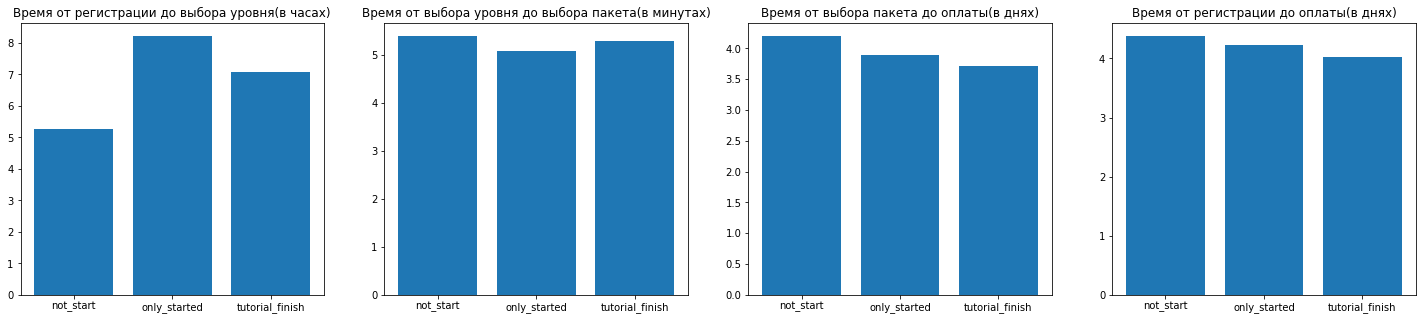

In [18]:
#Построим график для наглядного сравнения
fig,axes = plt.subplots(1,4,figsize=(25,5))
axes[0].bar(x = mean_event_df['Tutorial'], height = mean_event_df['timedelta_registr_level'])
axes[0].set_title('Время от регистрации до выбора уровня(в часах)')
axes[1].bar(x = mean_event_df['Tutorial'], height = mean_event_df['timedelta_level_questions'])
axes[1].set_title('Время от выбора уровня до выбора пакета(в минутах)')
axes[2].bar(x = mean_event_df['Tutorial'], height = mean_event_df['timedelta_questions_purchase'])
axes[2].set_title('Время от выбора пакета до оплаты(в днях)')
axes[3].bar(x = mean_event_df['Tutorial'], height = mean_event_df['timedelta_registration_purchase'])
axes[3].set_title('Время от регистрации до оплаты(в днях)')

Вывод по задаче №1:

Исходя из полученных данных можно сделать вывод, что самая большая разница во времени прохождения различных этапов для пользователей, которые прошли обучение от пользователей, не начинавших обучение происходит на этапе регистрации до выбора уровня сложности. Пользователи не начинавшие обучение тратят здесь времени меньше всего. Логично предположить, что это связано с пропуском этапа обучения.
В то же время, эти же пользователи ,которые не проходили обучение, тратят больше всего времени на этапах выбора пакета вопросов и оплаты, но эта разница незначительна.

В целом, на этапах от выбора уровня сложности до выбора пакета вопросов и от регистрации до оплаты невелика.

Обучение незначительно сокращает время прохождения этапов.

    Задача №2
Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение само по себе влияет на оплату, и без разницы, каким этапом оно шло.

  Найдем долю пользователей, которые оплатили вопросы по отношению к разным группам:
  * зарегистрировались
  * начали обучение
  * закончили обучение
  * не проходили обучение
  * выбрали пакет вопросов
  * выбрали уровень сложности
    

In [19]:
paying_users =  total_events_df[total_events_df['event_type'] == 'purchase']['user_id'].nunique()
pack_choice_users = total_events_df[total_events_df['event_type'] == 'pack_choice']['user_id'].nunique()
level_choice_users = total_events_df[total_events_df['event_type'] == 'level_choice']['user_id'].nunique()
percent_of_pay_registr = paying_users / len(registered_users)
percent_of_pay_start = paying_users / len(tutorial_start_users)
percent_of_pay_finish = paying_users / len(finished_tutorial_users)
percent_of_pay_not_start = paying_users / len(not_started_tutorial)
percent_of_pay_pack = paying_users/ pack_choice_users
percent_of_pay_level = paying_users / level_choice_users

print ('Процент пользователей, которые оплатили вопросы (от числа пользователей, которые зарегистрировались): {:.2%}'.format(percent_of_pay_registr))
print ('Процент пользователей, которые оплатили вопросы (от числа пользователей, которые начали обучение): {:.2%}'.format(percent_of_pay_start))
print ('Процент пользователей, которые оплатили вопросы (от числа пользователей, которые закончили обучение): {:.2%}'.format(percent_of_pay_finish))
print ('Процент пользователей, которые оплатили вопросы (от числа пользователей, которые не начинали обучение): {:.2%}'.format(percent_of_pay_not_start))
print ('Процент пользователей, которые оплатили вопросы (от числа пользователей, которые выбрали пакет вопросов): {:.2%}'.format(percent_of_pay_pack))
print ('Процент пользователей, которые оплатили вопросы (от числа пользователей, которые выбрали уровень сложности): {:.2%}'.format(percent_of_pay_level))


Процент пользователей, которые оплатили вопросы (от числа пользователей, которые зарегистрировались): 8.03%
Процент пользователей, которые оплатили вопросы (от числа пользователей, которые начали обучение): 13.49%
Процент пользователей, которые оплатили вопросы (от числа пользователей, которые закончили обучение): 15.61%
Процент пользователей, которые оплатили вопросы (от числа пользователей, которые не начинали обучение): 19.83%
Процент пользователей, которые оплатили вопросы (от числа пользователей, которые выбрали пакет вопросов): 27.89%
Процент пользователей, которые оплатили вопросы (от числа пользователей, которые выбрали уровень сложности): 19.18%


Исходя из полученных данных можно отметить, что среди пользователей, начавших/закончивших/не начинавших обучение больше всего оплат произвели те, кто не проходил обучение. 

Далее сгруппируем данные по типу события обучения (кто начал обучение, кто закончил обучение), по покупке.
   

In [20]:
#Сделаем таблицу с пользователями,которые начали обучение
users_tutorial = total_events_df.groupby(['user_id'])['event_type'].apply(lambda x: (x=='tutorial_start').sum()).reset_index().\
    rename(columns={"event_type": "Tutorial_count"})

#Сделаем таблицу с пользователями,которые закончили обучение
users_tutorial_finished = total_events_df.groupby(['user_id'])['event_type'].apply(lambda x: (x=='tutorial_finish').sum()).reset_index().\
    rename(columns={"event_type": "Tutorial_finish_count"})

#Сделаем таблицу с пользователями и кол-вом покупок
users_purchase = total_events_df.groupby(['user_id'])['event_type'].\
    apply(lambda x: (x=='purchase').sum()).reset_index().\
    rename(columns={"event_type": "Purchase_count"})

#Объединим датафреймы users_tutorial и users_purchase
users_tutorial_purchase = users_tutorial.merge(users_purchase, how="left", on="user_id")
#Объединим датафреймы users_tutorial_finished и users_purchase
users_tutorial_finished_purchase=users_tutorial_finished.merge(users_purchase, how="left", on="user_id")

#Сгруппируем данные
#те, кто начали обучение
grouped_tutorial_count = users_tutorial_purchase.groupby(['Tutorial_count']).\
    agg({'user_id': 'count', 'Purchase_count': 'sum'}).reset_index()
#закончили обучение
grouped_tutorial_finished_count = users_tutorial_finished_purchase.groupby(['Tutorial_finish_count']).\
    agg({'user_id': 'count', 'Purchase_count': 'sum'}).reset_index()

grouped_tutorial_count.info()
display(grouped_tutorial_count)

grouped_tutorial_finished_count.info()
display(grouped_tutorial_finished_count)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Tutorial_count  10 non-null     int64
 1   user_id         10 non-null     int64
 2   Purchase_count  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


,Tutorial_count,user_id,Purchase_count
0,0,8068,22
1,1,9103,1207
2,2,1589,218
3,3,427,51
4,4,221,30
5,5,109,16
6,6,116,14
7,7,94,12
8,8,86,13
9,9,113,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Tutorial_finish_count  10 non-null     int64
 1   user_id                10 non-null     int64
 2   Purchase_count         10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


,Tutorial_finish_count,user_id,Purchase_count
0,0,9676,153
1,1,8015,1143
2,2,1321,182
3,3,345,44
4,4,178,19
5,5,117,19
6,6,101,15
7,7,97,15
8,8,54,6
9,9,22,4


In [21]:
# Посчитаем вероятность оплаты
#те, кто начали обучение
grouped_tutorial_count['payment_possibility']= grouped_tutorial_count['Purchase_count']/grouped_tutorial_count['user_id']*100
print(grouped_tutorial_count)
#закончили обучение
grouped_tutorial_finished_count['payment_possibility']= grouped_tutorial_finished_count['Purchase_count']/grouped_tutorial_finished_count['user_id']*100
print(grouped_tutorial_finished_count)

   Tutorial_count  user_id  Purchase_count  payment_possibility
0               0     8068              22             0.272682
1               1     9103            1207            13.259365
2               2     1589             218            13.719320
3               3      427              51            11.943794
4               4      221              30            13.574661
5               5      109              16            14.678899
6               6      116              14            12.068966
7               7       94              12            12.765957
8               8       86              13            15.116279
9               9      113              17            15.044248
   Tutorial_finish_count  user_id  Purchase_count  payment_possibility
0                      0     9676             153             1.581232
1                      1     8015            1143            14.260761
2                      2     1321             182            13.777441
3           

Text(0.5, 0, 'Количество обучений')

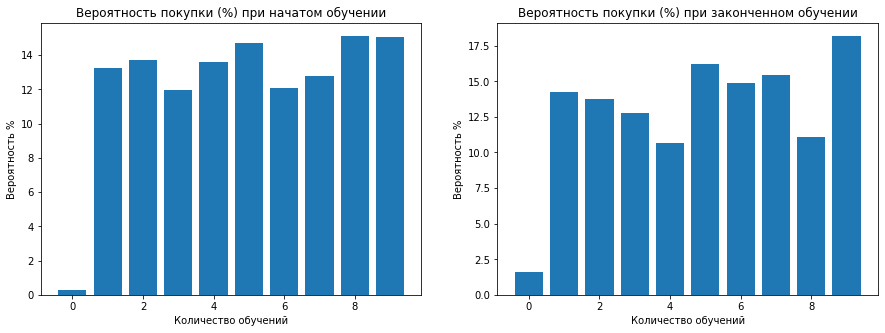

In [22]:
# Выведем зависимость вероятности оплаты
fig_2,axes_2 = plt.subplots(1,2,figsize=(15,5))
axes_2[0].bar(x = grouped_tutorial_count['Tutorial_count'], height = grouped_tutorial_count['payment_possibility'])
axes_2[0].set_title('Вероятность покупки (%) при начатом обучении')
axes_2[0].set_ylabel('Вероятность %')
axes_2[0].set_xlabel('Количество обучений')
axes_2[1].bar(x = grouped_tutorial_finished_count['Tutorial_finish_count'], height = grouped_tutorial_finished_count['payment_possibility'])
axes_2[1].set_title('Вероятность покупки (%) при законченном обучении')
axes_2[1].set_ylabel('Вероятность %')
axes_2[1].set_xlabel('Количество обучений')

Выводы по задаче №2

Исходя из получившихся данных можно сделать вывод, что не важно, какое количество обученний прошёл пользователь 1 или 9, как в нашем случае, само по себе обучение влияет на оплату.

     Задача №3
 Как часто пользователи начинают обучение после того, как они выбрали уровень сложности? Это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

In [23]:
#Создадим датафрейм с пользователями и временем начала обучения
user_tutorial_start_df = total_events_df[total_events_df['event_type']=='tutorial_start'][['event_time','user_id']].rename(columns={'event_time':'tutorial_start_time'})
#Создадим датафрейм с пользователями и временем выбора уровня сложности
user_level_choice_df = total_events_df[total_events_df['event_type']=='level_choice'][['event_time','user_id']].rename(columns={'event_time':'level_choice_time'})
#Объединим датафреймы
user_group_df= pd.merge(user_tutorial_start_df,user_level_choice_df,on= 'user_id')
user_group_df

,tutorial_start_time,user_id,level_choice_time
0,2018-01-01 15:00:51,27835,2018-01-01 20:37:22
1,2018-01-01 19:11:36,27839,2018-01-01 22:37:50
2,2018-01-02 02:07:07,27840,2018-01-02 05:18:42
3,2018-01-02 03:03:44,27845,2018-01-02 06:19:18
4,2018-01-02 07:08:00,27845,2018-01-02 06:19:18
...,...,...,...
12681,2018-12-31 07:14:38,47732,2018-12-31 09:59:00
12682,2018-12-31 10:21:11,47747,2018-12-31 12:24:40
12683,2018-12-31 20:54:56,47753,2018-12-31 22:36:19
12684,2019-01-01 00:08:14,47755,2019-01-01 05:04:52


In [24]:
#Оставим только те значения времени, которые подразумевают переход от выбора уровня сложности к началу обучения
condit=user_group_df.tutorial_start_time > user_group_df.level_choice_time
user_group_df= user_group_df[condit]
user_group_df

,tutorial_start_time,user_id,level_choice_time
4,2018-01-02 07:08:00,27845,2018-01-02 06:19:18
6,2018-01-02 09:01:51,27842,2018-01-02 08:46:03
7,2018-01-02 18:08:01,27842,2018-01-02 08:46:03
12,2018-01-02 20:34:31,27852,2018-01-02 18:39:44
19,2018-01-03 11:17:41,27862,2018-01-03 04:19:32
...,...,...,...
12626,2018-12-28 17:28:42,47635,2018-12-28 11:43:38
12640,2018-12-28 21:44:13,47657,2018-12-28 21:25:49
12641,2018-12-28 21:53:06,47657,2018-12-28 21:25:49
12665,2018-12-29 22:50:57,47711,2018-12-29 21:23:23


In [25]:
#Сгруппируем данные в датафрейм
return_to_training_df=user_group_df[['user_id', 'tutorial_start_time']].groupby(['user_id']).count()
return_to_training_df['user_id']=return_to_training_df.index
return_to_training_df=return_to_training_df.groupby(['tutorial_start_time']).count().reset_index().rename(columns={'tutorial_start_time':'return_to_training'})
return_to_training_df = return_to_training_df.rename(columns={'user_id':'users'})
return_to_training_df

,return_to_training,users
0,1,819
1,2,229
2,3,116
3,4,77
4,5,57
5,6,51
6,7,28
7,8,9


In [26]:
level_choice_users_but_not_start= level_choice_users-(return_to_training_df.users.sum())
print('Количество пользователей, выбравших уровень сложности: {}'.format(level_choice_users))  
print('Количество пользователей, выбравших уровень сложности, повторно прошедших обучение: {}'.format(return_to_training_df.users.sum()))
print('Количество пользователей, выбравших уровень сложности, которые не начинали обучение: {}'.format(level_choice_users_but_not_start))
perc1=level_choice_users_but_not_start/level_choice_users
perc2=return_to_training_df.users.sum()/level_choice_users
print('Процент пользователей, которые повторно не начинали обучение от пользователей, выбравших уровень: {:.2%}'.format(perc1))
print('Процент пользователей, которые повторно начали обучение от пользователей, выбравших уровень: {:.2%}'.format(perc2))

Количество пользователей, выбравших уровень сложности: 8342
Количество пользователей, выбравших уровень сложности, повторно прошедших обучение: 1386
Количество пользователей, выбравших уровень сложности, которые не начинали обучение: 6956
Процент пользователей, которые повторно не начинали обучение от пользователей, выбравших уровень: 83.39%
Процент пользователей, которые повторно начали обучение от пользователей, выбравших уровень: 16.61%


In [27]:
#Найдём соотношение пользователей, которые выбрали уровень сложности с количеством возвращений
return_to_training_df['%']=return_to_training_df['users']/level_choice_users*100
display(return_to_training_df)

,return_to_training,users,%
0,1,819,9.817789
1,2,229,2.745145
2,3,116,1.390554
3,4,77,0.923040
4,5,57,0.683289
5,6,51,0.611364
6,7,28,0.335651
7,8,9,0.107888


Text(0.5, 0, 'Количество обучений')

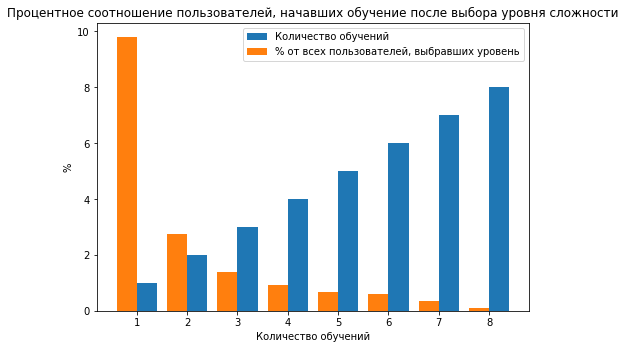

In [28]:
# Выведем визуализацию
fig = plt.figure()
axes = fig.add_axes([0, 1, 1, 1])
axes.bar(x = return_to_training_df['return_to_training'], height = return_to_training_df['return_to_training'], 
         width = 0.4, align = 'edge', label = 'Количество обучений')
axes.bar(x = return_to_training_df['return_to_training'], height = return_to_training_df['%'], 
         width = -0.4, align = 'edge', label = '% от всех пользователей, выбравших уровень')
axes.legend(loc = 1)
axes.set_title('Процентное соотношение пользователей, начавших обучение после выбора уровня сложности')
axes.set_ylabel('%')
axes.set_xlabel('Количество обучений')

<AxesSubplot:xlabel='return_to_training', ylabel='%'>

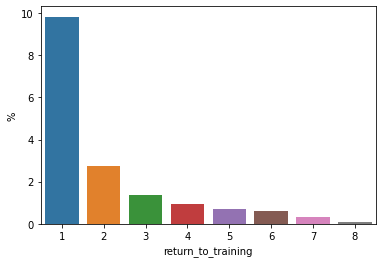

In [29]:
#Посмотрим как будут выглядеть данные на другой диаграмме
sns.barplot(x = 'return_to_training', y = '%', data = return_to_training_df[['return_to_training','%']])


Выводы по задаче №3

Чуть меньше 10% пользователей возвращаются один раз к повтору обучения после выбора уровня сложности. Далее судя по диаграмме и данным эти цифры сводятся к минимуму.

Учитывая, что 83% пользователей не возвращаются к повтору обучения вовсе. Можно сделать вывод, что процесс взаимодействия с игрой прозрачен, работа с приложением понятна.